In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("Churn_Data.csv")
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
countries = train.Geography.unique()

In [5]:
countries

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
Exited = train.loc[train.Exited == 1]
Exited

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [7]:
totalExited = len(train.loc[train.Exited == 1])
totalExited

2037

In [8]:
def findCountryWiseChurnRatio(countryName):
    
    totalPeople = len(train.loc[train.Geography == countryName])
    print(totalPeople)
    totalExitedPerCountry = len(train.loc[(train.Exited == 1) & (train.Geography == countryName)])
    print(totalExitedPerCountry)
    return ((totalExitedPerCountry/totalPeople)*100)

In [9]:
churnPercentageByCountry = {x:np.round(findCountryWiseChurnRatio(x)) for x in countries}
churnPercentageByCountry

5014
810
2477
413
2509
814


{'France': 16.0, 'Spain': 17.0, 'Germany': 32.0}

In [10]:
percentage = {findCountryWiseChurnRatio(x) for x in countries}
percentage

5014
810
2477
413
2509
814


{16.15476665337056, 16.673395236172787, 32.44320446392985}

In [14]:
sns.set_style("whitegrid")

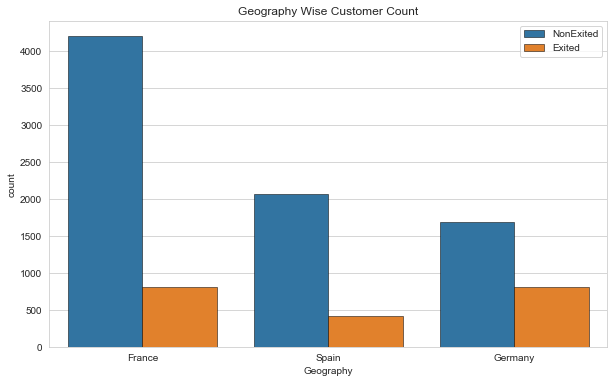

In [28]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=train,
               x='Geography',
               hue='Exited',
               edgecolor=(0,0,0),
               linewidth=0.5)
plt.title('Geography Wise Customer Count')
plt.legend(['NonExited','Exited'])

Text(0.5, 1.0, 'Age Wise Balance Distribution')

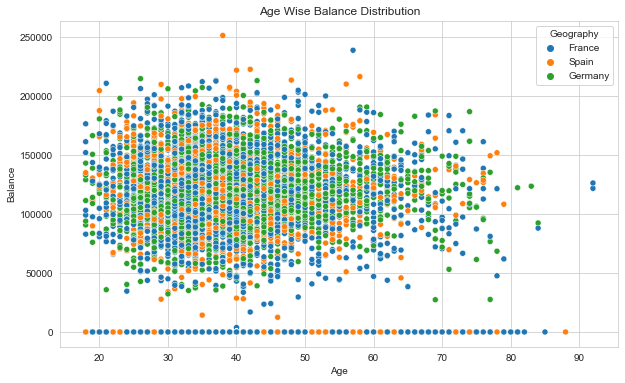

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Balance",hue="Geography",data=train,)
plt.title('Age Wise Balance Distribution')

In [79]:
def distribution(category):
    NonExited = train[train.Exited == 0][category]
    Exited = train[train.Exited == 1][category]
    plt.figure(figsize=(10,6))
    sns.set()
    plt.hist(NonExited,alpha=0.75,bins = 100, label = 'Not Exited', color = "blue", weights = np.ones(len(NonExited))/len(NonExited))
    plt.hist(Exited, alpha = 0.70, bins = 100, label = 'Exited', color = "red", weights = np.ones(len(Exited))/len(Exited))
    plt.xlabel(category)
    plt.ylabel('Density')
    plt.legend(loc = 'upper right')
    plt.legend(loc = 'upper right')
    plt.title('{} Distribution'.format(category))
    plt.show()

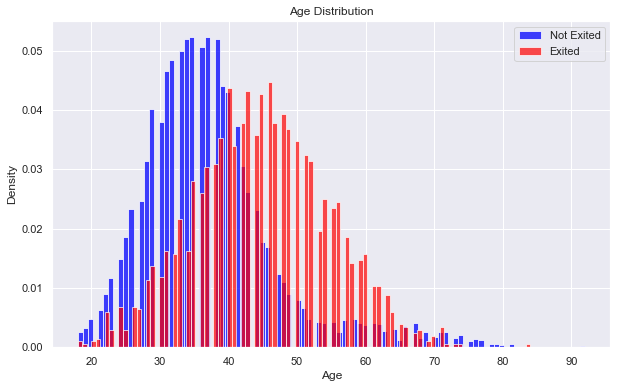

In [80]:
distribution('Age')

In [84]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [86]:
lr = np.ones(20)

In [89]:
lr/20

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [92]:
train[train.Exited == 0]['Age']

1       41
3       39
4       43
6       50
8       44
        ..
9993    28
9994    29
9995    39
9996    35
9999    28
Name: Age, Length: 7963, dtype: int64

In [41]:
np.ones(len(train[train.Exited == 0]['Age']))/len(train[train.Exited == 0]['Age'])

array([0.00012558, 0.00012558, 0.00012558, ..., 0.00012558, 0.00012558,
       0.00012558])

In [42]:
x1 = list(train[train.Geography == 'France']['Balance'])
x2 = list(train[train.Geography == 'Germany']['Balance'])
x3 = list(train[train.Geography == 'Spain']['Balance'])

Text(0.5, 1.0, 'Balance distribution with country')

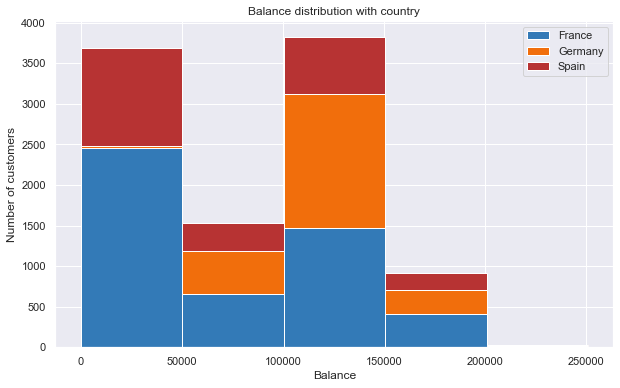

In [45]:
sns.set()
plt.figure(figsize=(10,6))
plt.hist([x1,x2,x3],bins = 5, stacked = True, color = ['#337ab7','#f16e0c','#b73333'],)
plt.xlabel('Balance')
plt.ylabel('Number of customers')
plt.legend(['France','Germany','Spain'])
plt.title('Balance distribution with country')


Text(0.5, 1.0, 'Estimated salary with age')

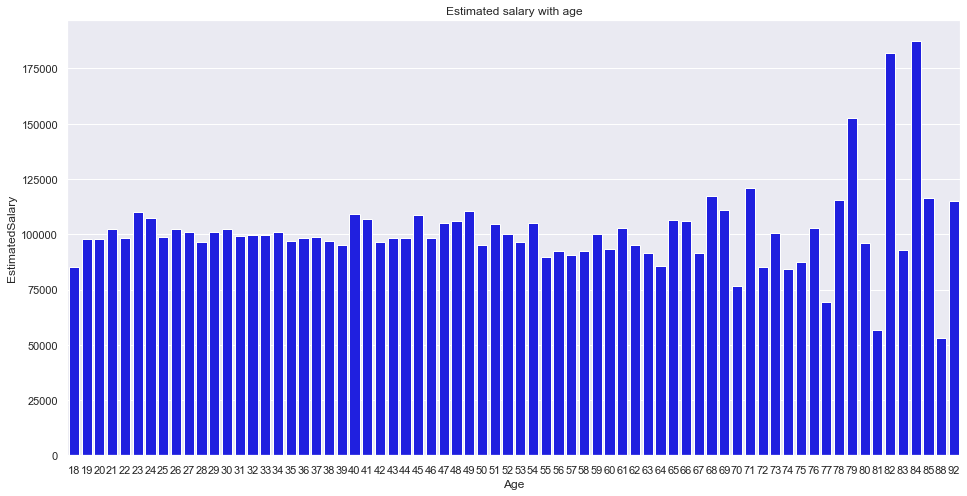

In [135]:
plt.figure(figsize=(16,8))
sns.barplot(x='Age',y='EstimatedSalary',data = train, color = 'blue', ci=None)
plt.title('Estimated salary with age')